# K-Nearst Neighbors Model

In [320]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [321]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [322]:
df.dropna(inplace=True)

### One Hot Encoding

In [323]:
# def one_hot_encode(data, column, suffix=''):
#     encoded = pd.get_dummies(data[column], drop_first= True)
#     data = data.drop(column, axis = 1)
#     data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
#     # data = data.join(encoded)
#     return data

In [324]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [325]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'Complain', 'Total_Spent', 'AOV']]

# data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age']]

data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [326]:

ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)


In [327]:
data.head()

,Income,Kidhome,Teenhome,Response,Recency,TotalPurchases,Complain,NumWebVisitsMonth,Age,Education_Graduation,Education_Master,Education_PhD,Education_n_cycle,Marital_Status_Single,Marital_Status_Together
0,84835.0,0,0,1,0,15,0,1,54,1.0,0.0,0.0,0.0,1.0,0.0
1,57091.0,0,0,1,0,18,0,5,63,1.0,0.0,0.0,0.0,1.0,0.0
2,67267.0,0,1,0,0,11,0,2,66,1.0,0.0,0.0,0.0,0.0,0.0
3,32474.0,1,1,0,0,4,0,7,57,1.0,0.0,0.0,0.0,0.0,1.0
4,21474.0,1,0,1,0,8,0,7,35,1.0,0.0,0.0,0.0,1.0,0.0


In [328]:
# ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
# column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
# ohe_education = one_hot_encode.fit_transform(data[['Education']])
# data = data.drop(['Marital_Status', 'Education'], axis=1)
# data = pd.concat([data, ohe_education], axis=1)
# data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [329]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [330]:
# X.dtypes

In [331]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [332]:
X_train.dtypes

Kidhome                      int64
Teenhome                     int64
Recency                      int64
TotalPurchases               int64
Complain                     int64
NumWebVisitsMonth            int64
Age                          int64
Education_Graduation       float64
Education_Master           float64
Education_PhD              float64
Education_n_cycle          float64
Marital_Status_Single      float64
Marital_Status_Together    float64
dtype: object

# Scaling

In [333]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# K-Nearest

In [334]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [335]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

auc = roc_auc_score(y_test, preds)

In [336]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8381
Precision: 0.4459
Recall: 0.3333
F1: 0.3815
AUC: 0.6302


# Figures

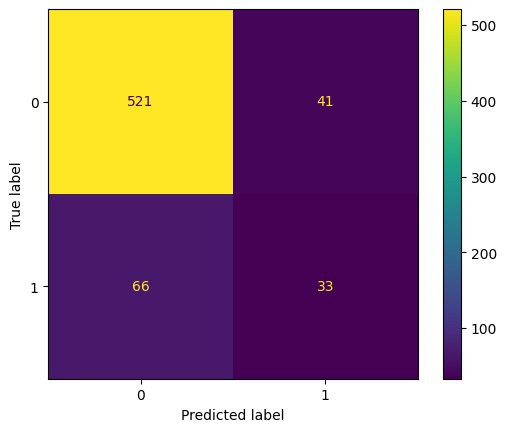

In [337]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)

cm_display.plot()
plt.show()

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  

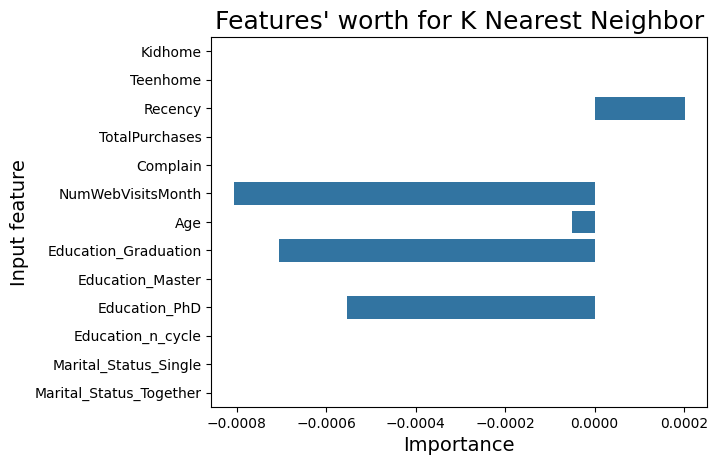

Recency: 0.00020171457387796465
Marital_Status_Together: 0.0
Marital_Status_Single: 0.0
Education_n_cycle: 0.0
Education_Master: 0.0
Complain: 0.0
TotalPurchases: 0.0
Teenhome: 0.0
Kidhome: 0.0
Age: -5.042864346949116e-05
Education_PhD: -0.0005547150781644028
Education_Graduation: -0.0007060010085728763
NumWebVisitsMonth: -0.0008068582955118586


In [338]:
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), X.columns)
#     ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for K Nearest Neighbor", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")